# BA780 Analyzing Inpatient medical expense in US

## Contents

### 1. Introduction
##### 1.1 Data source
##### 1.2 Objectives
##### 1.3 Term Explanation

### 2. Data Preparation
##### 2.1 Data Pre-processing
##### 2.2 Data Overview

### 3. Exploratory Data Analysis
##### 3.1 Total Payment by State
##### 3.2 Medicare Payment by State
##### 3.3 Coverage Rate by State
##### 3.4 Coverage Rate Findings
##### 3.5 Life Expectancy/Income

### 4. Conclusions

### 5. References

## 1. Introduction

#### 1.1 Data source

We collect our data from CMS(Centers for Medicare & Medicaid Services) official website. CMS is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. We are going to focus on analyzing the data 'Medicare Provider Utilization and Payment Data: Inpatient' from the year 2011 to 2017. Moreover, we collect the United state's household income by states and life expectancy by state data from the CDC(Centers for Disease Control and Prevention) and the United States Census Bureau. We will use the US household income from 2010 to 2017 by states and the life expectancy data including estimates of U.S. life expectancy at birth by state and census tract for the period 2010-2015. 

#### 1.2 Objectives

Our goal is to analyze the inpatient expense of US medicare. We would like to explore the relations of covered rate, medicare charges, and total payments with regions, using visualization for medical charges and payments in different states from 2011 to 2017. Based on the exploratory analysis results, we will further utilize a machine learning model to predict total payments using relevant features. In addition, we are going to find and to analyze the relationship between inpatient expense and household income, inpatient expense, and life expectancy. 

#### 1.3 Term Explanation

The following terms are 3 primary factors that we use to analyze the inpatient expense of US medicare. 
- Total payments: all expenses that the hospital charged to patients(amount of patient paid + amount of medicare paid) 
- Medicare payment: the amount of expenses that paid by Medicare
- Cover rate: Medicare payment/Total Payments
- Life expectancy: is a measure of the average time an individual is expected to live
- Income: we have use the median of household income for our following analytics

## 2. Data Preparation

#### 2.1 Data Pre-processing

##### Import packages

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [13]:
inpatient_2015=pd.read_csv('inpatient_2015.csv')
inpatient_2017=pd.read_csv('Inpatient_2017.csv')
life_expectancy = pd.read_csv('US_life_expectancy.csv')
payment_7years = pd.read_csv('patments_by_state_in_7_years.csv')
inpatient_payment_by_year = pd.read_csv('inpatient_payment_by_year.csv')
income = pd.read_csv('ACSST1Y2015.S1901_data_with_overlays_2020-11-19T221147.csv')

In [4]:
inpatient_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201876 entries, 0 to 201875
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   provider_id                           201876 non-null  int64  
 1   provider_name                         201876 non-null  object 
 2   provider_street_address               201876 non-null  object 
 3   provider_city                         201876 non-null  object 
 4   provider_state                        201876 non-null  object 
 5   provider_zipcode                      201876 non-null  int64  
 6   drg_definition                        201876 non-null  object 
 7   hospital_referral_region_description  201876 non-null  object 
 8   total_discharges                      201876 non-null  int64  
 9   average_covered_charges               201876 non-null  float64
 10  average_total_payments                201876 non-null  float64
 11  

In [5]:
inpatient_2015.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,drg_definition,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,year
0,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,920 - COMPLICATIONS OF TREATMENT W CC,AZ - Mesa,12,47278.50,7217.33,6591.00,2015
1,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,AZ - Mesa,17,34340.76,5054.41,3878.88,2015
2,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,AZ - Mesa,81,49419.77,8717.20,7727.91,2015
3,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,432 - CIRRHOSIS & ALCOHOLIC HEPATITIS W MCC,AZ - Mesa,14,53101.64,12381.79,10193.29,2015
4,30036,CHANDLER REGIONAL MEDICAL CENTER,1955 WEST FRYE ROAD,CHANDLER,AZ,85224,309 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...,AZ - Mesa,57,35851.40,5964.14,5067.09,2015


In [6]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            51 non-null     object 
 1   Life Expectancy  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


In [7]:
life_expectancy.head()

,State,Life Expectancy
0,AL,75.5
1,AK,78.8
2,AZ,79.9
3,AR,76.0
4,CA,81.3


In [8]:
income = income[['Geographic Area Name', 'Households!!Estimate!!Median income (dollars)']]
income.rename(columns={'Geographic Area Name': "state", 'Households!!Estimate!!Median income (dollars)': "household_median_income"}, inplace=True)
fullname = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", 
            "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", 
            "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", 
            "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", 
            "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
            "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
shortname = ["AK", "AL", "AR", "AZ",  "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "IA", "ID", "IL", "IN",  "KS", "KY", "LA", "MA", "MD", "ME",  
           "MI", "MN", "MO", "MS", "MT","NC","ND", "NE","NH","NJ","NM", "NV",   
           "NY", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VA", "VT",  "WA", "WI", "WV", "WY"]
income.sort_values(by='state',ascending=True,inplace=True)
state = pd.DataFrame({'state':fullname, 'abbreviation':shortname})
income_state = state.merge(income,on='state')
income_state = income_state.drop('state',axis=1)

In [9]:
income_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   abbreviation             51 non-null     object
 1   household_median_income  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [10]:
income_state.head()

,abbreviation,household_median_income
0,AK,73355
1,AL,44765
2,AR,41995
3,AZ,51492
4,CA,64500


#### 2.2 Data Overview

At the beginning, we will look at the overall average level of medical payments in the United States from 2011 to 2017.

In [10]:
pivot_table = payment_7years.pivot_table(index ='provider_state', values=['average_total_payments','average_medicare_payments','cover_rate'])
pivot_table.round(2).head()

,average_medicare_payments,average_total_payments,cover_rate
provider_state,,,
AK,16106.92,18215.90,0.88
AL,7754.21,9184.43,0.84
AR,8246.93,9588.60,0.86
AZ,10905.00,12628.81,0.86
CA,14054.08,15770.23,0.89


Text(0.5, 0.98, 'Avgerage Total Payments in 7 years by state')

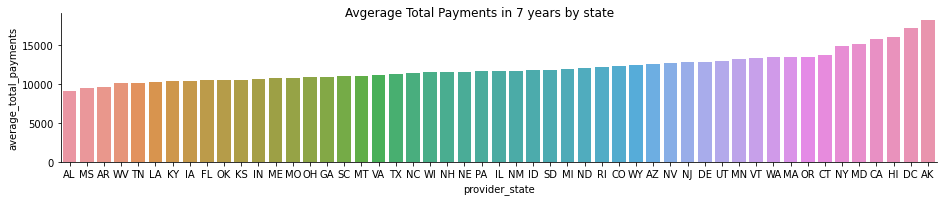

In [5]:
table1=payment_7years.sort_values('average_total_payments')
g1 = sns.catplot(kind='bar',x="provider_state",y='average_total_payments',data=table1,height=2.6, aspect=5)
g1.fig.suptitle("Avgerage Total Payments in 7 years by state")

Text(0.5, 0.98, 'Avgerage Medicare Payments in 7 years by state')

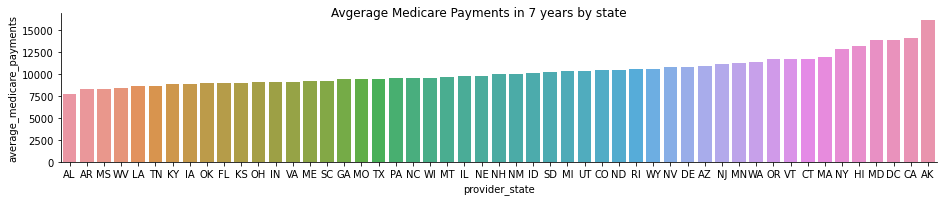

In [6]:
table2=payment_7years.sort_values('average_medicare_payments')
g2 = sns.catplot(kind='bar',x="provider_state",y='average_medicare_payments',data=table2 ,height=2.6, aspect=5)
g2.fig.suptitle("Avgerage Medicare Payments in 7 years by state")

The two charts above show the average medicare payment has consistency with the average total payment in these 7 years we researched, for example, the states with the smallest or the largest amount of medicare payment are those have the smallest or the largest amount of total payment.


Text(0.5, 0.98, 'Average Cover Rate in 7 years by state')

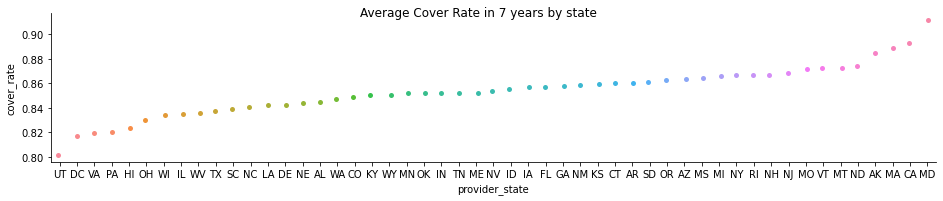

In [8]:
table3=payment_7years.sort_values('cover_rate')
g3 = sns.catplot(x="provider_state",y='cover_rate',data=table3 ,height=2.6, aspect=5)
g3.fig.suptitle("Average Cover Rate in 7 years by state")

As a whole, each state’s cover rate has little to do with medical payments and total payments, for example, as one of the most expensive medicare and total payment states, such as Hi and DC, become one of the states with the lowest cover rate, but AK and MD retain the high level of cover rate with the expensive medicare and total payment.

The table below shows the average total payment through out the US from 2011 to 2017. As we mention previously, we insert a 'year' column for each inpatient table. We union the inpatient payment tables altogether and list the average total payment for each year from 2011 to 2017. We are trying to see how does the US overall average total payments change throughout the times. As the list result shows, the average total payment increased each year from 2011 to 2017, especially that there was a significant increase during the year 2013 to 2014. The reason behind this was probably due to the Patient Protection and Affordable Care Act, and commonly known as Obamacare. The act came up in 2010 and implemented in 2014. 

In [13]:
pm_by_year = inpatient_payment_by_year[['year','average_total_payments']]
pm_by_year = pm_by_year.groupby('year').mean()
pm_by_year

,average_total_payments
year,
2011,9816.182595
2012,10073.755765
2013,10518.629270
2014,13261.383875
2015,13297.207508
2016,13801.743273
2017,14111.211998


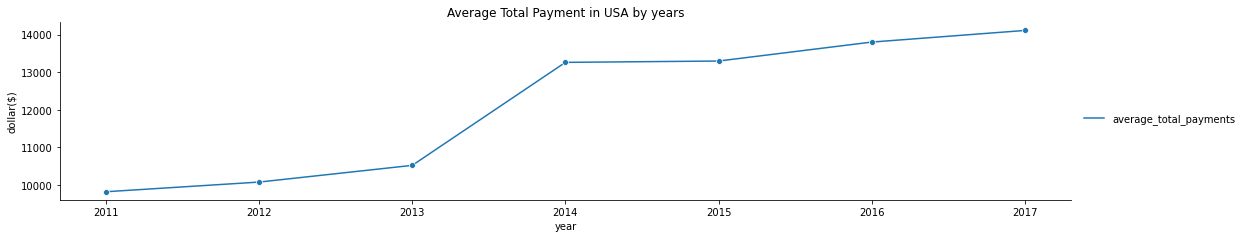

In [14]:
sns.relplot(kind='line', marker='o', data=pm_by_year,height=3, aspect=5)
plt.title('Average Total Payment in USA by years')
plt.ylabel('dollar($)')
sns.despine()
#test#

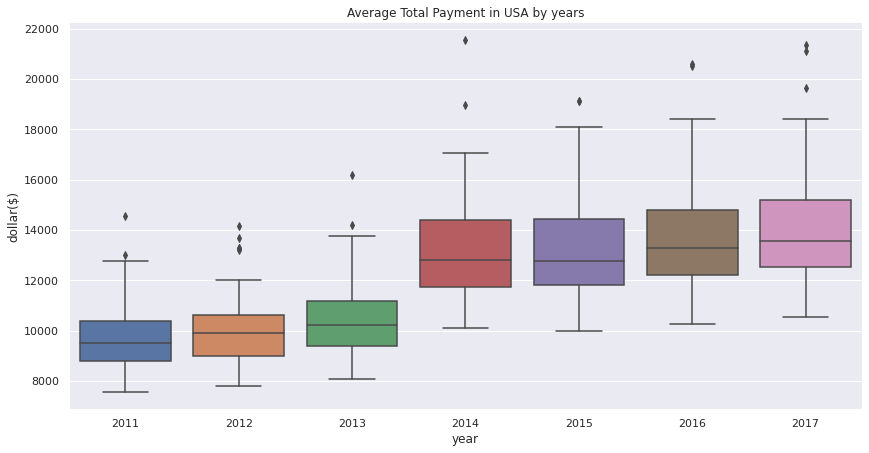

In [112]:
pm_by_year_state = inpatient_payment_by_year[['year','provider_state','average_total_payments']] 
sns.catplot(x="year", y="average_total_payments", data=pm_by_year_state, kind ='box',height=6, aspect=2)
plt.title('Average Total Payment in USA by years')
plt.ylabel('dollar($)')
sns.despine()

## 3. Exploratory Data Analysis

#### 3.1 What is the average total payment in each state in 2017?

As the table shows, the TOP 5 average total payment states are Alaska(AK), Washington D.C(DC), Hawaii(HI), California(CA), and Maryland(MD). And the state with lowest average total cost is Alabama(AL) with $10520 in year 2017.

In [13]:
pm_2015 = inpatient_2015[['provider_state','average_total_payments']]
pm_2015 = pm_2015.groupby('provider_state').mean().sort_values(by='average_total_payments',ascending = False).reset_index()
pm_2015.head(5)

,provider_state,average_total_payments
0,DC,19137.899176
1,AK,19125.670494
2,HI,18080.274527
3,CA,17170.263905
4,MD,16692.964310


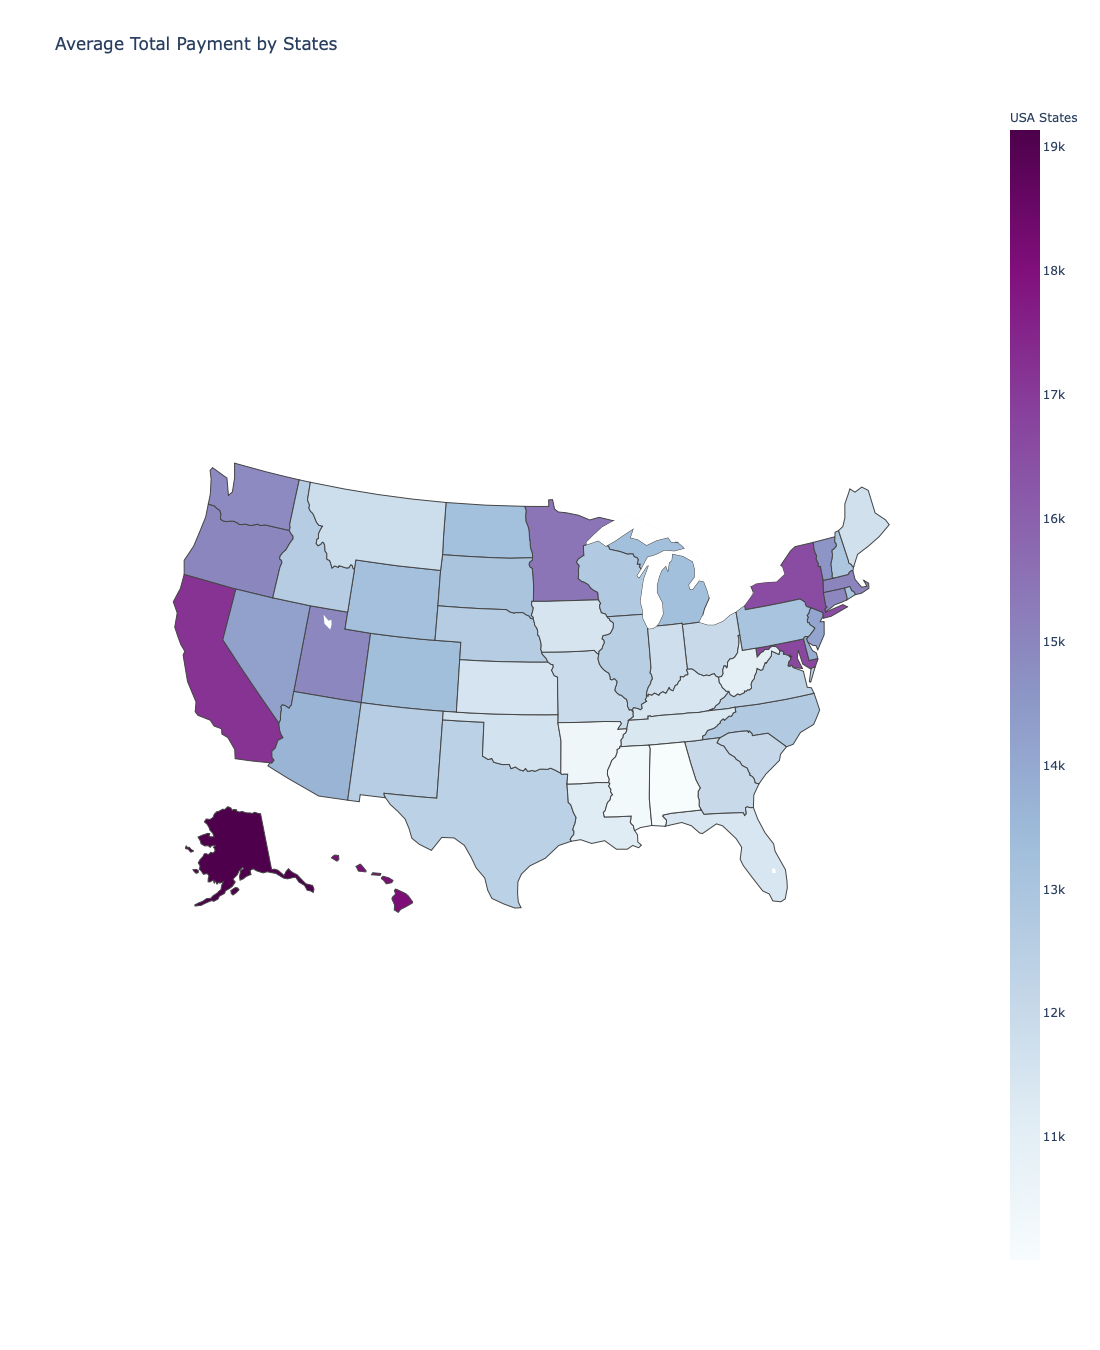

In [102]:
map_data = dict(type='choropleth',
            locations=pm_2015['provider_state'],
            locationmode='USA-states',
            colorscale='BuPu',
            text=pm_2015['provider_state'],
            z=pm_2015['average_total_payments'],
            colorbar=dict(title="USA States"),
           )
map_layout = dict(title = 'Average Total Payment by States', geo = {'scope':'usa'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
iplot(map_actual)

#### 3.2 How does Medicare perform in different states?

After comparing the result in each state to the nationwide medicare payments, it is obvious that medicare payments adjust geographically. And about one third of states have a higher medicare payment than the average.

Text(0.5, 1.0, 'Medicare payments in states compared to nationwide average in 2015')

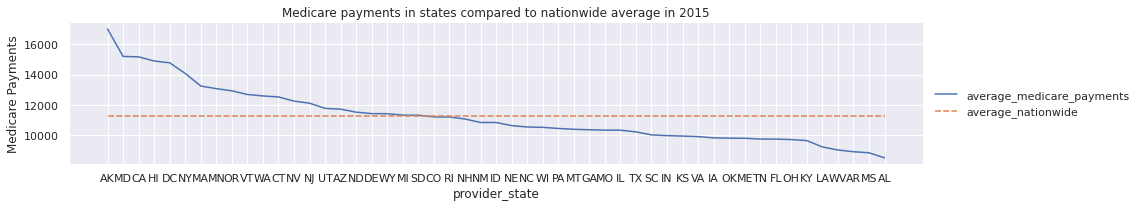

In [37]:
medicare_payments = inpatient_2015[['provider_state','average_medicare_payments']]
medicare_payments_states = (medicare_payments.groupby('provider_state').mean()).sort_values(by="average_medicare_payments",ascending = False)
avg_nation_m = medicare_payments_states['average_medicare_payments'].mean()
medicare_payments_states['average_nationwide'] = avg_nation_m
medicare_payments_states = medicare_payments_states.eval('Relative_to_nationwide = average_medicare_payments/average_nationwide').round({'Relative_to_nationwide':2})
df_medicare = medicare_payments_states.drop(['average_nationwide'],axis=1)
#df_medicare.info()
#df_medicare
df_plot = medicare_payments_states.drop(['Relative_to_nationwide'],axis=1)
sns.relplot(data=df_plot, kind = 'line',height=2.6, aspect=5)
plt.ylabel('Medicare Payments')
plt.title('Medicare payments in states compared to nationwide average in 2015')

#### 3.3 What is the inpatient coverage rate in each state?

We use medicare payments divided by total payments to get the coverage rate. We can see the coverage rate varies from state to state.

In [28]:
cover_rate = inpatient_2015[['provider_state','average_medicare_payments','average_total_payments']]
c = cover_rate.groupby('provider_state').sum().eval('cover_rate = average_medicare_payments/ average_total_payments').round({'cover_rate':3})
c.reset_index()
df = c.sort_values('cover_rate', ascending=False).reset_index()
df = df[['provider_state','cover_rate']]
df

,provider_state,cover_rate
0,MD,0.911
1,AK,0.890
2,CA,0.884
3,MA,0.882
4,MT,0.880
5,SD,0.871
6,ND,0.871
7,VT,0.870
8,MO,0.870
9,GA,0.867


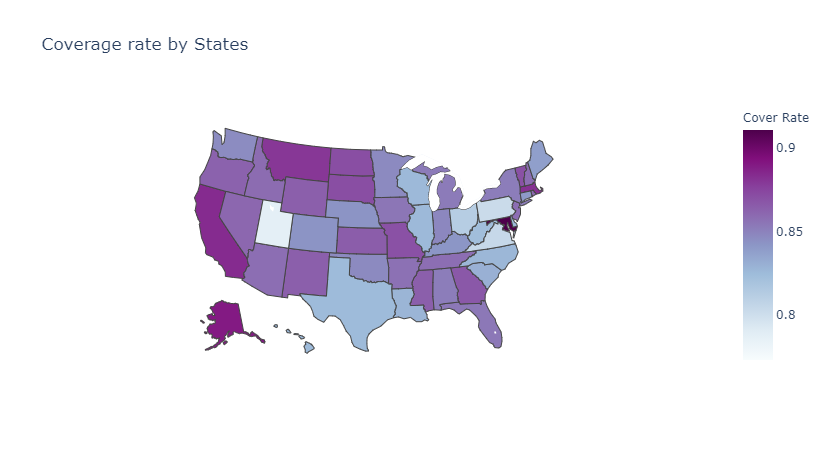

In [29]:
map_data = dict(type='choropleth',
            locations=df['provider_state'],
            locationmode='USA-states',
            colorscale='BuPu',
            text=df['provider_state'],
            z=df['cover_rate'],
            colorbar=dict(title="Cover Rate"),
           )
map_layout = dict(title = 'Coverage rate by States', geo = {'scope':'usa'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
iplot(map_actual)

#### 3.4 Why are the coverage rates for each state different?

We noticed that the coverage rates for each state in 2015 ranges from 0.77 (DC) to 0.91 (MD), so we would like to find the reason for the differences. We seek to clinical conditions (DRG_Definition in data), and list the clinical conditions with the highest covered charges for states with top 5 and bottom 5 coverage rates.

Top clinical conditions for top 5 states by total covered charges:

In [14]:
inpatient_top_states = inpatient_2015[inpatient_2015['provider_state'].isin(['MD', 'AK', 'CA', 'MA', 'MT'])]
inpatient_top_states_pivot = pd.pivot_table(inpatient_top_states, values='average_medicare_payments', index='drg_definition', columns='provider_state', aggfunc='sum')
inpatient_top_states_pivot = inpatient_top_states_pivot[['MD', 'AK', 'CA', 'MA', 'MT']]
inpatient_top_states_pivot = inpatient_top_states_pivot.sort_values('CA', ascending=False)
inpatient_top_states_pivot.head(10)

provider_state,MD,AK,CA,MA,MT
drg_definition,,,,,
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,1511656.67,147789.60,7849348.22,1472536.40,221148.55
870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,1240522.87,121940.50,7263706.31,1218854.79,85435.29
"003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",688861.08,128857.67,4278506.33,1437187.57,NaN
"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",906788.55,NaN,4272473.93,755311.81,NaN
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,1268943.90,43052.23,4221416.82,1134736.26,156649.95
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,788067.75,125966.18,4182979.98,690964.36,96794.46
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,1111361.50,NaN,3798422.86,812832.44,35662.92
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,910051.66,136955.77,3733334.50,809480.68,141865.56
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,981859.92,140987.47,3104605.70,852573.47,189197.62


In [15]:
# Filter top 30 clinical conditions
inpatient_top_states_pivot = inpatient_top_states_pivot.reset_index()
inpatient_top_states_pivot = inpatient_top_states_pivot.head(30)

In [16]:
# Use state as a single column for plotting purpose
inpatient_top_states_graph = pd.melt(inpatient_top_states_pivot, id_vars='drg_definition', value_vars=['MD', 'AK', 'CA', 'MA', 'MT'], value_name='total_covered_charges')

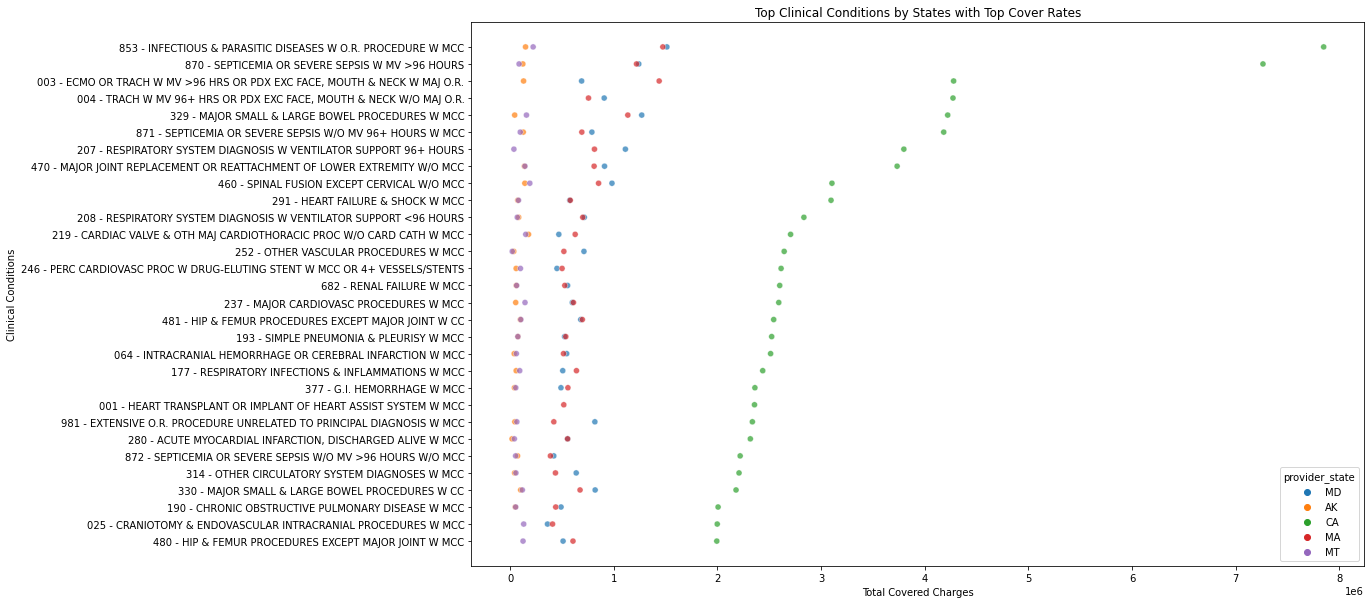

In [17]:
# Plot top clinical conditions by states with top cover rates
size = (16, 10)
fig, ax = plt.subplots(figsize=size)
top_g = sns.scatterplot(data=inpatient_top_states_graph, x='total_covered_charges', y='drg_definition', hue='provider_state', alpha=0.7, ax=ax)
top_g.set(xlabel = 'Total Covered Charges', ylabel = 'Clinical Conditions')
plt.title('Top Clinical Conditions by States with Top Cover Rates')
plt.show(top_g)

Top clinical conditions for last 5 states by total covered charges:

In [18]:
inpatient_last_states = inpatient_2015[inpatient_2015['provider_state'].isin(['DC', 'UT', 'PA', 'VA', 'OH'])]
inpatient_last_states_pivot = pd.pivot_table(inpatient_last_states, values='average_medicare_payments', index='drg_definition', columns='provider_state', aggfunc='sum')
inpatient_last_states_pivot = inpatient_last_states_pivot[['DC', 'UT', 'PA', 'VA', 'OH']]
inpatient_last_states_pivot = inpatient_last_states_pivot.sort_values('PA', ascending=False)
inpatient_last_states_pivot.head(10)

provider_state,DC,UT,PA,VA,OH
drg_definition,,,,,
"003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",438171.05,457902.33,2757695.41,864961.89,1667906.26
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,302790.27,325650.55,2448235.76,1345307.13,2030499.30
"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",282150.80,NaN,1991720.41,836204.71,1244790.95
870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,213322.07,91986.26,1631844.28,1031592.27,1548991.23
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,114909.66,179251.05,1560067.69,1038787.26,1668935.43
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,67295.01,310674.55,1493847.83,676932.07,1362341.58
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,132280.44,337671.47,1481473.24,883887.12,1269011.34
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,100549.92,258768.23,1378464.73,711796.06,1139173.41
219 - CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/O CARD CATH W MCC,53294.15,265990.51,1160323.26,504902.29,628835.59


In [19]:
# Filter top 30 clinical conditions, and use state as a single column for plotting purpose
inpatient_last_states_pivot = inpatient_last_states_pivot.reset_index()
inpatient_last_states_pivot = inpatient_last_states_pivot.head(30)
inpatient_last_states_graph = pd.melt(inpatient_last_states_pivot, id_vars='drg_definition', value_vars=['DC', 'UT', 'PA', 'VA', 'OH'], value_name='total_covered_charges')

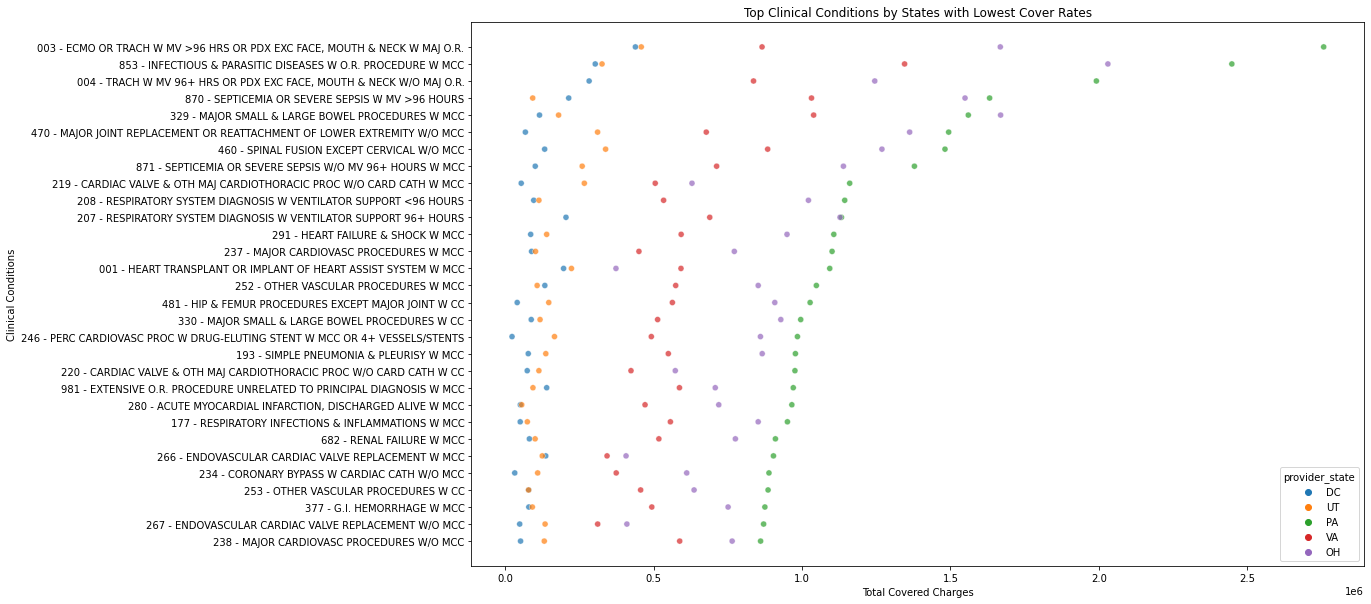

In [20]:
# Plot top clinical conditions by states with lowest cover rates
size = (16, 10)
fig, ax = plt.subplots(figsize=size)
last_g = sns.scatterplot(data=inpatient_last_states_graph, x='total_covered_charges', y='drg_definition', hue='provider_state', alpha=0.7, ax=ax)
last_g.set(xlabel = 'Total Covered Charges', ylabel = 'Clinical Conditions')
plt.title('Top Clinical Conditions by States with Lowest Cover Rates')
plt.show(last_g)

The clinical conditions with the most covered charges for each state are similar, including major joint replacement, septicemia, heart failure, etc. Therefore, we further examine the coverage rates for the common top clinical conditions for those 10 states, and find out that coverage rates for those clinical conditions are good indicators of overall coverage rates for each state. 

In [21]:
# Find cover rate of each clinical condition in each state
cover_rate_drg = inpatient_2015[['provider_state','drg_definition', 'average_medicare_payments','average_total_payments']]
c_clinical_conditions_state = cover_rate_drg.groupby(['drg_definition', 'provider_state']).sum().eval('cover_rate = average_medicare_payments/ average_total_payments').round({'cover_rate':3})
c_clinical_conditions_state.reset_index(inplace=True)
c_clinical_conditions_state.head()

,drg_definition,provider_state,average_medicare_payments,average_total_payments,cover_rate
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,AL,141193.91,171081.18,0.825
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,AZ,167511.96,194081.39,0.863
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CA,2357132.49,2539536.61,0.928
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CO,209039.64,225019.73,0.929
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,CT,423119.40,571874.92,0.740


In [22]:
# Find the order of clinical conditions (drg_definition) by total covered charges
order = pd.pivot_table(cover_rate_drg, index='drg_definition', values='average_medicare_payments', aggfunc='sum').sort_values('average_medicare_payments', ascending=False).reset_index()
order_drg = list(order['drg_definition'])[:30]

In [23]:
# Filter by 10 states and top 30 conditions
c_compare = c_clinical_conditions_state.loc[
                                            (c_clinical_conditions_state['provider_state'].isin(['MD', 'AK', 'CA', 'MA', 'MT', 'OH', 'VA', 'PA', 'UT', 'DC'])) &
                                            (c_clinical_conditions_state['drg_definition'].isin(order_drg))
                                            ]

# Transform the date for cover rate heatmap
c_compare_pivot = pd.pivot_table(c_compare, values='cover_rate', index='drg_definition', columns='provider_state')

# Reorder the states by descending cover rates, and clinical conditions by total covered charges
top_drg = pd.Index(order_drg)
c_compare_pivot = c_compare_pivot.loc[top_drg, ['MD', 'AK', 'CA', 'MA', 'MT', 'OH', 'VA', 'PA', 'UT', 'DC']]

# Add a row for overall cover rate
overall = [['OVERALL STATE COVER RATE', 0.911, 0.890, 0.884, 0.882, 0.880, 0.812, 0.804, 0.802, 0.787, 0.773]]
overall_df = pd.DataFrame(overall, columns=['provider_state', 'MD', 'AK', 'CA', 'MA', 'MT', 'OH', 'VA', 'PA', 'UT', 'DC']).set_index('provider_state')
c_compare_pivot = pd.concat([overall_df, c_compare_pivot])
c_compare_pivot

provider_state,MD,AK,CA,MA,MT,OH,VA,PA,UT,DC
OVERALL STATE COVER RATE,0.911,0.890,0.884,0.882,0.880,0.812,0.804,0.802,0.787,0.773
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC,0.950,0.965,0.937,0.932,0.974,0.873,0.882,0.872,0.828,0.813
"003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",0.961,0.986,0.924,0.919,NaN,0.903,0.808,0.864,0.839,0.776
870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,0.939,0.864,0.935,0.937,0.978,0.893,0.872,0.871,0.894,0.829
329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,0.941,0.969,0.928,0.930,0.956,0.875,0.868,0.850,0.777,0.776
"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",0.957,NaN,0.946,0.912,NaN,0.897,0.894,0.854,NaN,0.831
460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,0.776,0.936,0.880,0.916,0.887,0.827,0.823,0.850,0.700,0.824
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,0.897,0.868,0.816,0.874,0.827,0.793,0.782,0.822,0.709,0.766
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,0.937,0.917,0.896,0.899,0.890,0.854,0.849,0.846,0.828,0.791
207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS,0.947,NaN,0.931,0.920,0.971,0.860,0.852,0.841,NaN,0.823


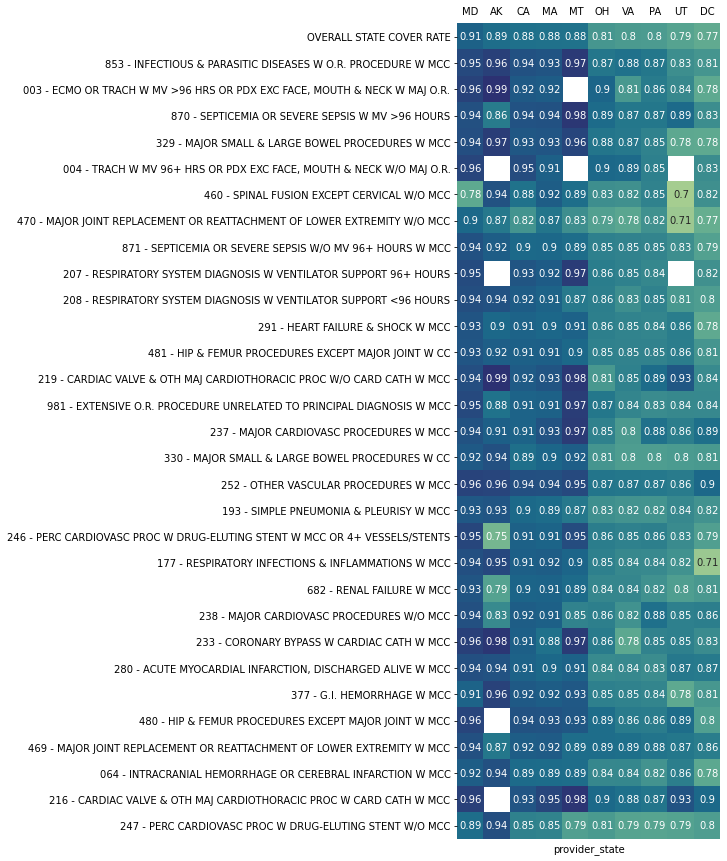

In [24]:
# Plot the heatmap
size = (20, 15)
fig, ax = plt.subplots(figsize=size)
sns.heatmap(data=c_compare_pivot, square=True, annot=True, cbar=False, cmap='crest', ax=ax)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

Different states have different cover rates for top clinical conditions, which explains the by-state difference in overall cover rates. For example, the cover rate for infectious & parasitic diseases is .91 in Maryland, which had the highest overall cover rate, while the cover rate for infectious & parasitic diseases in D.C. is only .77.

#### 3.5 The relationship between Life expectancy/Income and Avg_Total_Payment

Text(0.5, 0.98, 'The Relationship between Life expectancy and Income and Average total payment')

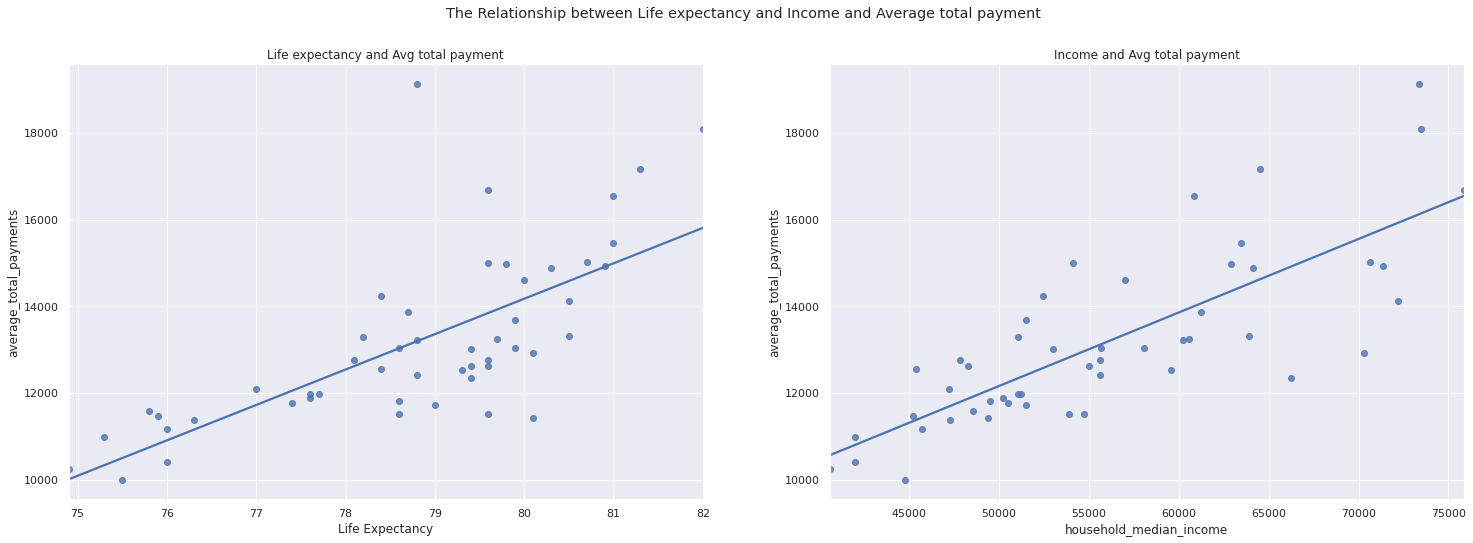

In [87]:
size = (25,8)
fig, ax = plt.subplots(1,2,figsize=size)

total_payment_by_state = inpatient_2015.copy()
total_payment_by_state_clean = total_payment_by_state.groupby('provider_state')['average_total_payments'].mean().to_frame().reset_index()
life_income_payment = life_expectancy.merge(total_payment_by_state_clean,left_on='State',right_on='provider_state', how='inner').drop('provider_state', axis=1)\
                                    .merge(income_state, left_on='State', right_on='abbreviation',how='inner').drop('abbreviation', axis=1)
a = sns.regplot(x='Life Expectancy',y='average_total_payments',data=life_income_payment,ax=ax[0],ci=None)
a.title.set_text('Life expectancy and Avg total payment')
b = sns.regplot(x='household_median_income',y='average_total_payments',data=life_income_payment,ax=ax[1],ci=None)
b.title.set_text('Income and Avg total payment')

plt.suptitle('The Relationship between Life expectancy and Income and Average total payment')

## 4. Conclusions

Conclusions:
1. Average total payment increased through 2011-2017.
2. The clinical condition is the major factor on cover rate.
3. Base on the regression charts between Life expectancy and Average total payment, we can conclude that there is a postive relationship between Life expectancy and Average total payment. 
           For example, if we have higher life expectancy, the Average total payment will be higher.
4. Base on the regression charts between Income_median and Average total payment, we can conclude that there is a postive relationship between Income_median and Average total payment. 
           For example, if we have higher Income, the Average total payment will be higher.

## 5. References

Reference：
- https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data
- https://data.census.gov/cedsci/table?q=S19&d=ACS%201-Year%20Estimates%20Subject%20Tables&tid=ACSST1Y2019.S1901
- https://www.cdc.gov/nchs/data-visualization/life-expectancy/ 